# Graded Lab Assignment: Logistic Regression (10 points)

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignment are distributed as follows:
* The implementation
    - prediction_function (0.5)
    - cost_function (1)
    - compute_gradient (1)
    - correct double for loop (2)
    - correct stop condition (0.5)
    - preventing overfitting (1)
    - systematically choosing learning rate (1) 
    - best score analysis (1)
    - summary (1)
    - comments (0.5)
    - code (0.5)
    

In [6]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


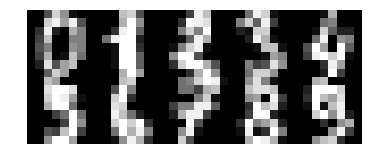

In [10]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Write a short summary of what you have done (and why) to accomplish steps (1), (2) and (3).
(5) Make sure to comment your code!

In [39]:
#Make a prediction function h
def prediction_function(x,theta):
    z = np.dot(theta.T,x)
    x_predict = ((1/(1+np.exp(-z))))
    return x_predict

In [43]:
# just checking if it does what it should
prediction_function((x[0,:].T),zeros((64,10)))

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5])

In [201]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):  
    cost = (dot(y, log(x_predict)) + dot((1 - y), log(1 - x_predict))) / (-x.shape[0])
    return cost

In [202]:
#Create a function that returns the gradient values, given h (x_predict), y and x: # outer
def compute_gradient(x_predict, y, x):
    # I am working with a vector of size 10 and a vector of size 64. 
    #But I want my ouput to be (64x10). therefore I use outer product
    dtheta = outer((x_predict - y),x) 
    return dtheta

In [221]:
#Choose a suitable learning rate
alpha = 0.0001
iterations = 250
theta = np.zeros((64,10))

#It is important to check that you're not overfitting by testing your prediction on a testset
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

target = digits.target[:1500]
target_test = digits.target[1500:]

def optimalisation(alpha,iterations,theta,x,y):
    for i in range(iterations): 
        for j in range(x.shape[0]):      
                x_predict = prediction_function(x[j,:].T,theta) # prediction function for each digit 
                y = np.zeros(10) # a vector of 10 zeros with which i initiate y
                y[target[j]] = 1
                dtheta = compute_gradient(x_predict,y,x[j,:]) 
                # updates theta
                theta = np.add(theta, np.multiply(-(alpha/(x.shape[0])),dtheta.T))
    return theta


In [222]:
theta = optimalisation(alpha,iterations,theta,x,target)

In [212]:
# this is a silly function, as it does the same thing again as the optimalisation function, 
# but this time I want to have an overview of what the cost has done during the iterations
# so i chose to run it again
def costarray (alpha,iterations,theta,x,y):
    cost_array = np.array([])
    for i in range(iterations): 
        for j in range(x.shape[0]):      
                x_predict = prediction_function(x[j,:].T,theta) # prediction function for each digit 
                y = np.zeros(10) # a vector of 10 zeros
                y[target[j]] = 1
                dtheta = compute_gradient(x_predict,y,x[j,:])
                theta = np.add(theta, np.multiply(-(alpha/(x.shape[0])),dtheta.T))
        cost = cost_function(x_predict,y)
        cost_array = np.append(cost_array, cost)
    return cost_array


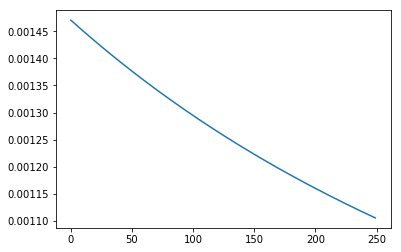

In [214]:
# showing the change of cost
plot(arange(iterations),costarray(alpha,iterations,theta,x,target))

In [223]:
# And now I want to see how many classifications are actually correct with my optimised theta
def correctlyclassified(x,y):
    correct = 0
    for j in range(x.shape[0]):
        classj = argmax(prediction_function(x[j,:].T,theta))# finds the class of each sample
        if classj == target[j]: # compares the predicted class to the actualy class
            correct += 1
    correct = (correct /(x.shape[0])) * 100 # converts the absolute amount into a percentage
    return correct

In [224]:
correctlyclassified(x,target)

90.46666666666667

In [225]:
correctlyclassified(x_test,target_test)

10.774410774410773

# conclusion
This model uses logistic regression to classify handwritten numbers. It designs a functions in which thetas are used to manipulate the input (the colour of each pixel) to come to the right ouput (digit). This function is optimised using gradient descent. The cost function signals the extent to which the predictions are wrong. The correctlyclassified function yields the percentage of samples that were correctly classified. Firstly we can see that the cost is low and is decreasing, which is a good sign. However, we can also see that although almost all samples of the training function were correctly classified, the samples from the test function were barely. This makes my function a clear example of high-variance. This means that my model has an overfitting problem. I should solve this through regularisation. 

#### notes
I completely understand that my function is not (at all) done. However, there is just no time anymore to complete it. It was only today that I started to understand what we're supposed to do for this logistic regression function. I have watched all the videos (multiple times), but I don't think it's fair we only practiced with linear regression, before having to do this as graded assignment. Logistic regression is a huge leap from linear regression, especially because we're also doing multivariate. Although I got the theory about it (from the videos) this is still nothing like the actual execution. So we could only use our linear regression skills. And honestly when you base your logistic regression model on linear regression, you're completely off. I did this and I had a jupyter notebook that I worked on for a week and that had 800 iterations. The execution of linear and logistic regression barely have anything in common, especially when it comes to the loop. So i really think we should have talked about logistic regression much more, before we were thrown into doing a big graded assignment. Or practiced it... Or maybe have done logistic regression with two variables first. I have put all my other courses aside for the past 4 days to do this, so I am really dissapointed I will probably have a low grade. 